In [1]:
import os
os.chdir("/home/arne/devel/PycharmProjects/recursive-dependency-embedding")
from __future__ import print_function
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import spacy
import preprocessing
#from preprocessing import read_data, read_data2, string_reader, get_word_embeddings, process_sentence2, process_sentence3, process_sentence4, addMissingEmbeddings
import constants
from IPython.display import Image
from visualize import visualize, visualize2, getFromVocs
import tools

In [2]:
nlp = spacy.load('en')
nlp.pipeline = [nlp.tagger, nlp.entity, nlp.parser]
print('extract word embeddings from spaCy...')
vecs, mapping = preprocessing.get_word_embeddings(nlp.vocab)
# for processing parser output
data_maps = {constants.WORD_EMBEDDING: mapping}
data_maps2 = mapping
# data vectors
data_vecs = {constants.WORD_EMBEDDING: vecs}

extract word embeddings from spaCy...


In [3]:
import operator
def getCounts(seq_data, vocab, vocab_neg, data_maps_reverse):
    data_counts = {}
    for data in seq_data:
        tools.incOrAdd(data_counts, data)
    #print(data_counts)
    
    d = {getFromVocs(vocab, vocab_neg, data_maps_reverse[key]): data_counts[key] for key in data_counts}
    return sorted(d.items(), key=operator.itemgetter(1), reverse=True)

In [4]:

def read_sentence2(sentence, vis = False):
    seq_data, seq_parents = preprocessing.read_data(preprocessing.string_reader, preprocessing.process_sentence7, nlp, data_maps2, args={'content': sentence})#, tree_mode='sequence')
    #print('root: '+ str(root))
    
    data_maps_reverse = tools.revert_mapping(data_maps2)
    
    print('counts: '+str(getCounts(seq_data, nlp.vocab, constants.vocab_manual, data_maps_reverse)))
    #print('counts: ' + str(tools.getFromDicts(nlp.vocab, constants.vocab_manual,)))
    
        
    
        
    if vis == True:
        visualize2('forest_temp.png', (seq_data, seq_parents), data_maps_reverse, nlp.vocab, constants.vocab_manual)
        img = Image('forest_temp.png')
        display(img)
   
    return seq_data, seq_parents

In [5]:
sorted(data_maps2.values())[-10:]
len(sorted(data_maps2.values()))

1297620

start read_data ...
sentences read: 1
counts: [(u'DT', 6), (u'NNP', 6), (u'compound', 6), (u'det', 6), (u'IN', 5), (u'the', 5), (u'NN', 4), (u'prep', 4), (u'pobj', 4), (u'ORG', 4), (u'philippine', 3), (u'JJ', 3), (u'Philippine', 3), (u'punct', 3), (u'NNS', 3), (u'system', 2), (u'tectonic', 2), (u',', 2), (u'.', 2), (u'of', 2), (u'acl', 2), (u'dobj', 2), (u'nsubj', 2), (u'VBN', 2), (u'amod', 2), (u'fault', 2), (u'VBG', 1), (u'geophysicist', 1), (u'caused', 1), (u'into', 1), (u'System', 1), (u'related', 1), (u'an', 1), (u'archipelago', 1), (u'VBP', 1), (u'oprd', 1), (u'primarily', 1), (u'VBZ', 1), (u'WP', 1), (u'force', 1), (u'compressing', 1), (u'belt', 1), (u'what', 1), (u'throughout', 1), (u'geophysicists', 1), (u'-', 1), (u'faults', 1), (u'call', 1), (u'HYPH', 1), (u'RB', 1), (u'Fault', 1), (u'ROOT', 1), (u'be', 1), (u'forces', 1), (u'Mobile', 1), (u'GPE', 1), (u'Philippines', 1), (u'advmod', 1), (u'compress', 1), (u'NNPS', 1), (u'agent', 1), (u'pcomp', 1), (u'relate', 1), (u'The', 1

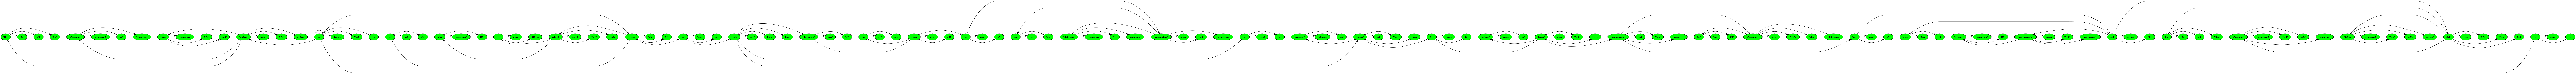

[    160      48      77     109   58435    9123      83  317859   39617
    9123      90    1519    6156 1297620      90     486     117   53146
 1297621     131     166      48      77   15966 1297622      89     141
      62 1297623    1160 1297624 1297625    3931     486      43      89
     114      60      82   12252 1297626      91    1519    2185      60
      82     109      48      77     431 1297626      89     114      60
      82     109      48      77   58435    9123      83  317859   72660
 1297626      90   67622      67      62      67    3969 1297627      94
    1848   63359 1297625     676     188      42      82   50708 1297624
      83    2629 1297626      91     964   37639   63359 1297628   19857
     109      48      77   14540 1297629 1297630      31   80802     229
      60      82     167 1297629     105   50708    9123      89  335812
 1297620      91  215470     476 1297631     103     109      48      77
      30   58435    9123      90      30  317859   

In [6]:
#sentence = 'London is a big city in the United Kingdom. I like this.'
sentence = 'The Philippine Fault System is an inter-related system of faults throughout the whole of the Philippine Archipelago, primarily caused by tectonic forces compressing the Philippines into what tectonic geophysicists call the Philippine Mobile Belt. '

#(seq_data, seq_parents, root) = read_sentence2('A very shy monkey is practicing martial arts. I like this.', True) 
(seq_data, seq_parents) = read_sentence2(sentence, True) 
#new_embeddings, added_count = addMissingEmbeddings(seq_data, vecs)
#new_embeddings, added_count = addMissingEmbeddings(seq_data, new_embeddings)
#vecs = new_embeddings

print(seq_data)
print(seq_parents)

In [7]:
preprocessing.read_data_2(preprocessing.string_reader, preprocessing.process_sentence2, nlp, data_maps2, args={'content': sentence}, max_depth=10)#, tree_mode='sequence')

start read_data ...
sentences read: 1


(array([   160,  58435,  39617,   6156,    117,    166,  15966,    141,
          1160,    486,    114,  12252,   2185,    109,    431,    114,
           109,  58435,  72660,     67,   3969,   1848,    188,  50708,
          2629,  37639,    109,  14540,    229,    167,  50708, 335812,
           476,    109,  58435,   7221,  16450,     70]),
 array([  3,   2,   1,   1,   0,   4,   2,   1,   1,  -5,  -1,  -1,  -1,
          1,  -2,  -1,   2,   1,  -3,  -8,   1, -10,  -1,   1,  -2,  -1,
          1,  -2,  -3,   3,   1,   1,  -4,   3,   2,   1,  -4, -33]),
 array([[32, 29,  1],
        [32, 31,  1],
        [32, 30,  2],
        [32, 36,  1],
        [32, 33,  2],
        [32, 34,  2],
        [32, 35,  2],
        [ 3,  0,  1],
        [ 3,  1,  1],
        [ 3,  2,  1],
        [ 4,  3,  1],
        [ 4,  0,  2],
        [ 4,  1,  2],
        [ 4,  2,  2],
        [ 4,  9,  1],
        [ 4,  5,  2],
        [ 4,  8,  2],
        [ 4,  6,  3],
        [ 4,  7,  3],
        [ 4, 10,  2]

In [8]:
import corpus_wikipedia
import numpy as np

children, roots = preprocessing.children_and_roots(seq_parents)
print(children)
print('calc depths ...')
depth = -np.ones(len(seq_data), dtype=np.int32)
for idx in range(len(seq_data)):
    if depth[idx] < 0:
        corpus_wikipedia.calc_depth(children, depth, idx)
print(depth)

{8: [6, 7], 1: [0, 4, 9], 11: [1, 10, 12, 13], 4: [2, 3, 5], 5: [8]}
calc depths ...
[0 4 0 0 3 2 0 0 1 0 0 5 0 0]


In [7]:
from preprocessing import build_sequence_tree, children_and_roots
children, roots = children_and_roots(seq_parents)
seq_tree = build_sequence_tree(seq_data, children, root)
seq_tree

head: 145
children {
  head: 5593
  children {
    head: 6313
    children {
      head: 291
      children {
        head: 48
      }
    }
    children {
      head: 5132
      children {
        head: 234
        children {
          head: 1297613
        }
      }
      children {
        head: 1297614
      }
    }
    children {
      head: 1297615
    }
  }
  children {
    head: 117
    children {
      head: 44
    }
  }
  children {
    head: 53146
  }
  children {
    head: 5353
    children {
      head: 7686
      children {
        head: 1297614
      }
    }
    children {
      head: 1297616
    }
  }
  children {
    head: 70
    children {
      head: 62
    }
  }
}
children {
  head: 110
  children {
    head: 1297615
  }
}
children {
  head: 53146
}
children {
  head: 139
  children {
    head: 1297616
  }
}
children {
  head: 70
  children {
    head: 62
  }
}

In [2]:
import tensorflow_fold as td
import tensorflow as tf
import numpy as np

embeddings_np = np.load('data/nlp/spacy/dict.vecs')[]
embedding_dim = embeddings_np.shape[1]
lex_size = 1300000
#print('load mappings from: ' + data_fn + '.mapping ...')
#mapping = pickle.load(open(data_fn + '.mapping', "rb"))
assert lex_size >= embeddings_np.shape[0], 'len(embeddings) > lex_size. Can not cut the lexicon!'
embeddings_padded = np.lib.pad(embeddings_np, ((0, lex_size - embeddings_np.shape[0]), (0, 0)), 'mean')

print('embeddings_np.shape: '+str(embeddings_np.shape))
print('embeddings_padded.shape: ' + str(embeddings_padded.shape))




embeddings_np.shape: (1297614, 300)
embeddings_padded.shape: (1300000, 300)


In [4]:
with tf.Graph().as_default():
    W = tf.Variable(tf.constant(0.0, shape=[lex_size, embedding_dim]),
                            trainable=False, name="W")

    embedding_placeholder = tf.placeholder(tf.float32, [lex_size, embedding_dim])
    embedding_init = W.assign(embedding_placeholder)
    a = tf.placeholder(tf.float32)
    
    sess = tf.Session()
    sess.run(embedding_init, feed_dict={embedding_placeholder: embeddings_padded})

In [12]:
embeds = td.Embedding(10000, 300, name='head_embed')

x = sequence_tree_block(300, embeds)
x.eval(seq_tree)
#seq_tree

AttributeError: 'ForwardDeclaration' object has no attribute 'eval'

In [12]:
import tensorflow_fold as td
import tensorflow as tf

lex_size = 5
state_size = 10

expr_decl = td.ForwardDeclaration(td.PyObjectType(), state_size)

# get the head embedding from id
def head(name_):
     return td.Pipe(td.Scalar(dtype='int32'), 
               td.Function(td.Embedding(lex_size, state_size, name='head_embed')), 
               name=name_)
# get the weighted sum of all children
def children_aggr(name_):
     return td.Pipe(td.Map(expr_decl()), 
                        td.Map(td.Function(lambda x: tf.norm(x) * x)), 
                        td.Reduce(td.Function(tf.add)), 
                        name=name_)

#dummy = td.con

gru_cell = td.ScopedLayer(tf.contrib.rnn.GRUCell(num_units=state_size), 'mygru')

#def aggr_op():
#    return (td.Record([('head', head), ('children', children_aggr)]) >>
#              td.Concat() >>
#              td.FC(state_size, name='FC_aggr'))
    #return ([children_aggr] >> td.RNN(gru_cell, initial_state=head))
    #return (children_aggr)

def cas(seq_tree):    
    # process and aggregate
    if len(seq_tree['children']) > 0 and seq_tree['head'] is not None:
        return 0
    # dont process children
    if len(seq_tree['children']) == 0:
        return 1
    # process children only
    return 2
    
    
cases = td.OneOf(lambda x: cas(x),
                     {1: td.Record([('head', head('head') >> td.Broadcast()), ('children', children_aggr('children_aggr') >> td.Broadcast())]) 
                      >> td.Zip() 
                      >> td.Reduce(td.Function(tf.add)), #td.RNN(gru_cell, initial_state_from_input=True),
                      2: td.GetItem('head') >> td.Optional(head('just_head')),
                      3: td.GetItem('children') >> children_aggr('just_children')})


expr_decl.resolve_to(cases)

In [ ]:
cases2 = td.OneOf(lambda x: cas(x),
                     {1: td.Record([('head', head('head') >> td.Broadcast()), ('children', children_aggr('children_aggr') >> td.Broadcast())]) 
                      >> td.Zip() 
                      >> td.Reduce(td.Function(tf.add)), #td.RNN(gru_cell, initial_state_from_input=True),
                      2: td.GetItem('head') >> td.Optional(head('just_head'))})

In [25]:
import numpy as np
def calc_embedding_avg(seq):
    seq_data, seq_types, seq_parents, seq_edges = seq
    e = np.zeros(nlp.vocab.vectors_length) # TODO: check dim of embeddings!
    for i in range(len(seq_data)):
        e += data_vecs[seq_types[i]][seq_data[i]]
    return e / len(seq_data) # average

In [26]:
calc_embedding_avg(read_sentence('A very shy monkey is practicing martial arts.'))

array([  1.07410002e-02,   1.04797661e-01,  -9.15853009e-02,
        -5.72742199e-02,   1.87026666e-01,  -2.82920011e-02,
         3.37927755e-02,  -1.95071244e-01,  -3.40955622e-03,
         2.12087999e+00,  -1.69830299e-01,   1.09519947e-02,
        -6.34260000e-02,  -1.11622448e-01,  -1.12552635e-02,
         1.59957554e-01,   1.04001443e-01,   8.65459439e-01,
        -2.38412996e-01,   5.50149985e-02,  -7.51673329e-02,
        -1.80346219e-01,  -8.34840544e-02,  -1.11868726e-01,
         8.09453333e-02,  -6.86778910e-02,  -1.04682251e-02,
        -4.30825555e-02,   6.12711095e-02,  -2.60911190e-01,
        -4.86684436e-02,   4.19144664e-03,   1.84042576e-01,
        -2.16793002e-01,   1.31033664e-01,  -8.43688916e-02,
         6.11080002e-02,  -5.91083342e-02,  -1.17230153e-01,
        -3.09220557e-01,   1.51952467e-01,   1.42462335e-01,
         1.21541668e-01,  -3.40155537e-02,   2.18288891e-01,
         2.27417561e-01,  -7.52422234e-02,   5.98678859e-02,
        -1.67224473e-02,

In [29]:
doc = nlp(u"Apples and oranges are ASdjkhaksdhkahd. Boots and hippos aren't.")

apples = doc[0]
oranges = doc[2]
boots = doc[6]
hippos = doc[8]

In [31]:
doc[4].orth

1510419

In [32]:
doc2 = nlp(u"Hello you ASdjkhaksdhkahd.")
doc2[2].orth

1510419

In [33]:
len(doc.vocab)

1297627

In [ ]:
#TODO: